In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

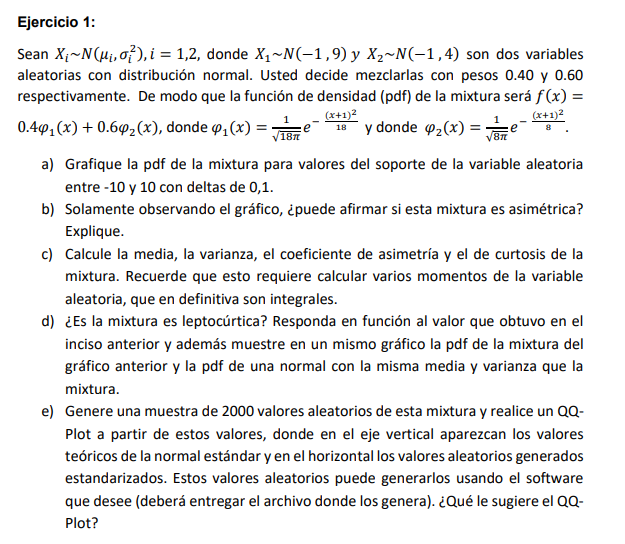

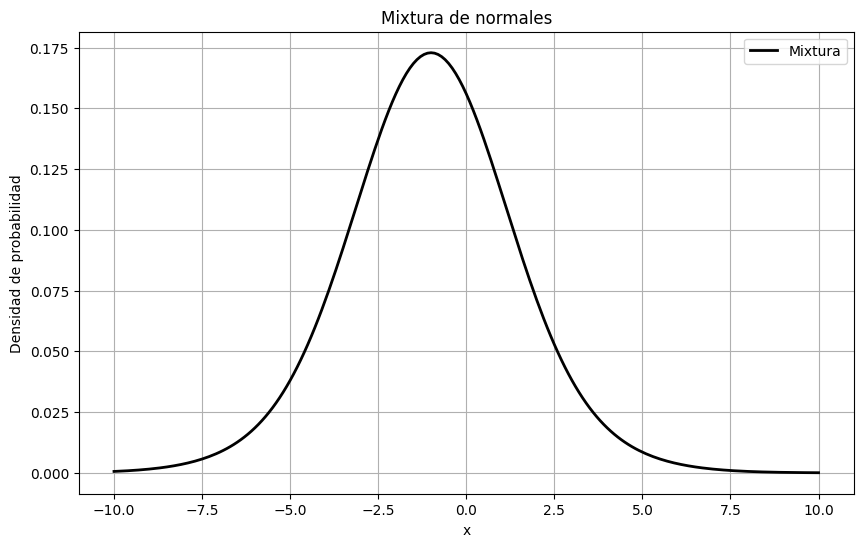

In [2]:
valores = np.arange(-10, 10.1, 0.1)
df = pd.DataFrame({'values': valores})

# Genero las pdfs
df['pdf_1'] = stats.norm.pdf(df['values'], loc=-1, scale=3)
df['pdf_2'] = stats.norm.pdf(df['values'], loc=-1, scale=2)
df['pdf_mixture'] = 0.4 * df['pdf_1'] + 0.6 * df['pdf_2']

plt.figure(figsize=(10, 6))
plt.plot(df['values'], df['pdf_mixture'], label="Mixtura", color="black", linewidth=2)
plt.title("Mixtura de normales")
plt.xlabel("x")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()

Se observa que es SIMETRICA, esto se debe a que las normales que estamos combinando poseen la misma media

In [3]:
w1 = 0.4
mu1 = -1
var1 = 9

w2 = 0.6
mu2 = -1
var2 = 4

# Media de la mixtura
mu_mix = w1 * mu1 + w2 * mu2

# Varianza de la mixtura
var_mix = w1 * (var1 + (mu1 - mu_mix) ** 2) + w2 * (var2 + (mu2 - mu_mix) ** 2)
std_mix = np.sqrt(var_mix)

# Tercer momento centrado
mu_3 = (
    w1 * ((mu1 - mu_mix) ** 3 + 3 * (mu1 - mu_mix) * var1)
    + w2 * ((mu2 - mu_mix) ** 3 + 3 * (mu2 - mu_mix) * var2))

# Cuarto momento centrado
mu_4 = (
    w1 * ((mu1 - mu_mix) ** 4 + 6 * (mu1 - mu_mix) ** 2 * var1 + 3 * var1 ** 2)
    + w2 * ((mu2 - mu_mix) ** 4 + 6 * (mu2 - mu_mix) ** 2 * var2 + 3 * var2 ** 2))

# Asimetría y kurtosis
skewness = mu_3 / (std_mix ** 3)
kurtosis_total = mu_4 / (var_mix ** 2)
kurtosis_exceso = kurtosis_total - 3

print("Media:", mu_mix)
print("Varianza:", round(var_mix,5))
print("Desvi std:", round(std_mix,5))
print("Tercer momento μ₃:", round(mu_3,5))
print("Cuarto momento μ₄:",   round(mu_4,5))
print("Asimetría:", round(skewness,5))
print("Kurtosis:", round(kurtosis_total,5))
print("Kurtosis en Exceso:", round(kurtosis_exceso,5))

Media: -1.0
Varianza: 6.0
Desvi std: 2.44949
Tercer momento μ₃: 0.0
Cuarto momento μ₄: 126.0
Asimetría: 0.0
Kurtosis: 3.5
Kurtosis en Exceso: 0.5


Dado que la Kurtosis en exceso > 0, la distribucion de la mixtura es Leptocurtica

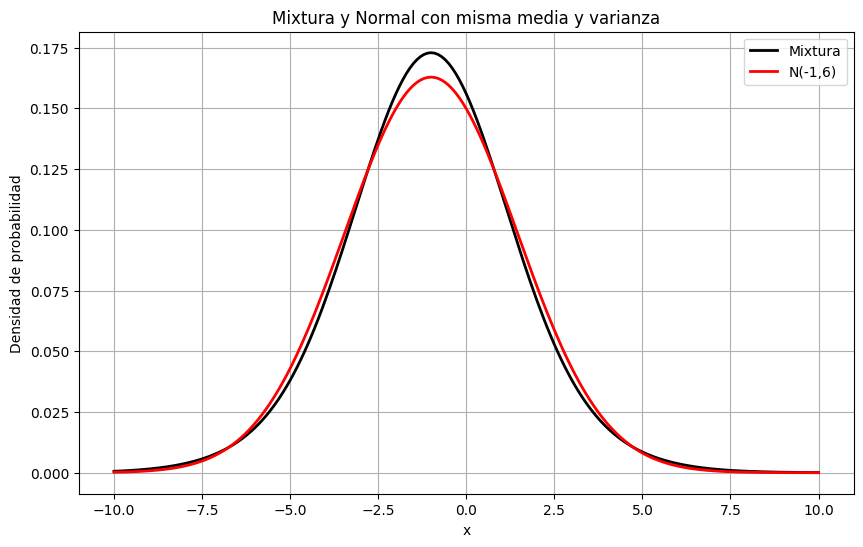

In [4]:
# agrego una normal con media -1 y varianza 6
df['pdf_3'] = stats.norm.pdf(df['values'], loc=-1, scale=2.45)

plt.figure(figsize=(10, 6))
plt.plot(df['values'], df['pdf_mixture'], label="Mixtura", color="black", linewidth=2)
plt.plot(df['values'], df['pdf_3'], label="N(-1,6)", color="red", linewidth=2)
plt.title("Mixtura y Normal con misma media y varianza")
plt.xlabel("x")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()

-0.9389095731154564
2.451402036635121


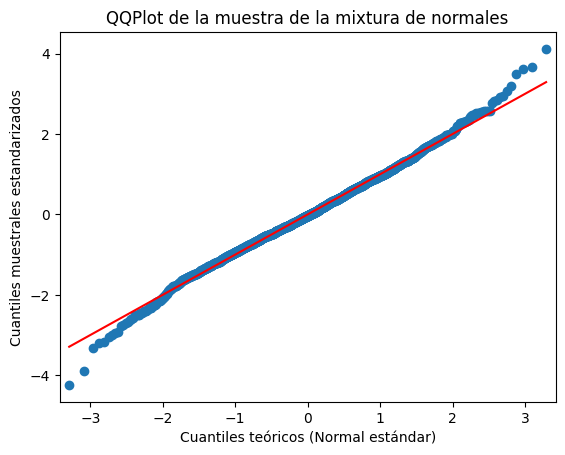

In [5]:
# QQ Plot
""" 
Cuando hacemos un muestreo con 2000 observaciones, debemos generar 3 vectores de numeros aleatorios.
Uno para la N(-1,9), otro para la N(-1,4) y otro para randomizarlas
Primero voy a generar 2000 valores de una N(-1,9), otros 2000 de u na N(-1,4) y otros 2000 de una uniforme [0,1]
Segundo, si la uniforme es < 0.4, elijo N(-1,9) y si no es, elijo N(-1,4). Esto representa los pesos con los que mezclo las normales
"""
n = 2000
weights = [0.4, 0.6]
mus = [-1, -1]
sigmas = [3, 2]

sample = np.zeros(n)
for i in range(n):
    component = np.random.choice([0, 1], p=weights) # 0 representa N(-1,9) y 1 a N(-1,4); p indica la probabilidad de elegir el valor de 0 o 1
    sample[i] = np.random.normal(mus[component], sigmas[component])

print(f"{np.mean(sample)}")
print(f"{np.std(sample)}")
sample_standardized = (sample - np.mean(sample)) / np.std(sample) # calculamos zi = (xi - X)/s

sm.qqplot(sample_standardized, line='s')
plt.xlabel("Cuantiles teóricos (Normal estándar)")
plt.ylabel("Cuantiles muestrales estandarizados")
plt.title("QQPlot de la muestra de la mixtura de normales")
plt.show()

Media: -1.0441180843246456
Desviación estándar: 2.4596166203834957


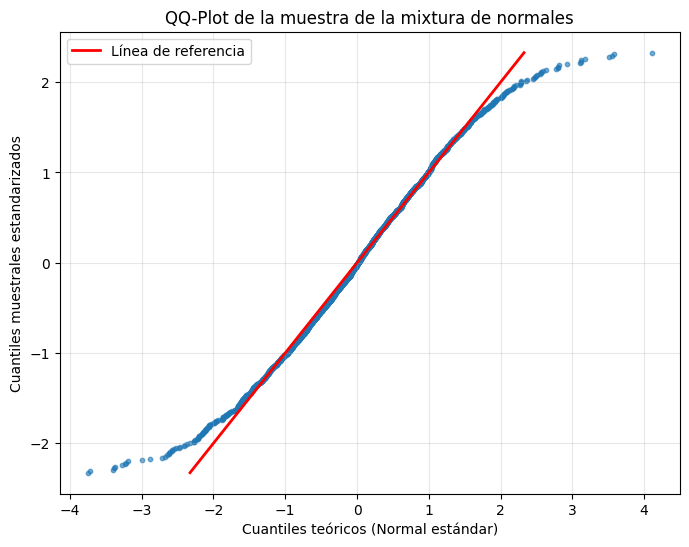

In [7]:
# QQ Plot usando matplotlib
n = 2000
weights = [0.4, 0.6]
mus = [-1, -1]
sigmas = [3, 2]

sample = np.zeros(n)
for i in range(n):
    component = np.random.choice([0, 1], p=weights)
    sample[i] = np.random.normal(mus[component], sigmas[component])

print(f"Media: {np.mean(sample)}")
print(f"Desviación estándar: {np.std(sample)}")

# Estandarizar la muestra
sample_standardized = (sample - np.mean(sample)) / np.std(sample)

# Ordenar la muestra
sample_sorted = np.sort(sample_standardized)

# Calcular los cuantiles teóricos de la distribución normal estándar
theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(sample_sorted)))

# Crear el QQ-plot
plt.figure(figsize=(8, 6))
plt.scatter(sample_sorted, theoretical_quantiles, alpha=0.6, s=10)

# Agregar línea de referencia (línea diagonal perfecta)
plt.plot([theoretical_quantiles.min(), theoretical_quantiles.max()], 
         [theoretical_quantiles.min(), theoretical_quantiles.max()], 
         'r-', linewidth=2, label='Línea de referencia')

plt.xlabel("Cuantiles teóricos (Normal estándar)")
plt.ylabel("Cuantiles muestrales estandarizados")
plt.title("QQ-Plot de la muestra de la mixtura de normales")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()